In [1]:
#give code to import a .pkl file
import pickle

def load_pkl(file):
    with open(file, 'rb') as f:
        return pickle.load(f)

model = load_pkl('model/final_model.pkl')

In [5]:
!pip install timm

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.4 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.4 MB 1.4 MB/s eta 0:00:02
   ----------------- ---------------------- 1.0/2.4 MB 1.6 MB/s eta 0:00:01
   -------------------------- ------------- 1.6/2.4 MB 2.0 MB/s eta 0:00:01
   ----------------------------------- ---- 2.1/2.4 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 2.2 MB/s eta 0:00:00


In [2]:
import torch
import timm
import numpy as np
from PIL import Image
import torchvision.transforms as transforms

# # Load pre-trained Swin Transformer model (PyTorch)
# model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True)
# model.eval()  # Set to evaluation mode

# Load and preprocess the image
image_path = 'cake.jpg'
image = Image.open(image_path).convert('RGB')
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Make a prediction
with torch.no_grad():
    output = model(image_tensor)
    predictions = torch.nn.functional.softmax(output[0], dim=0)
    predicted_class = predictions.argmax().item()

print("Predicted class index:", predicted_class)


Predicted class index: 0


In [4]:
l=['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', 'guacamole', 
    'baby_back_ribs', 'mussels', 'beef_carpaccio', 'poutine', 'hot_and_sour_soup', 
    'seaweed_salad', 'foie_gras', 'dumplings', 'peking_duck', 'takoyaki', 'bibimbap', 
    'falafel', 'pulled_pork_sandwich', 'lobster_roll_sandwich', 'carrot_cake', 'beet_salad', 
    'panna_cotta', 'donuts', 'red_velvet_cake', 'grilled_cheese_sandwich', 'cannoli', 
    'spring_rolls', 'shrimp_and_grits', 'clam_chowder', 'omelette', 'fried_calamari', 
    'caprese_salad', 'oysters', 'scallops', 'ramen', 'grilled_salmon', 'croque_madame', 
    'filet_mignon', 'hamburger', 'spaghetti_carbonara', 'miso_soup', 'bread_pudding', 
    'lasagna', 'crab_cakes', 'cheesecake', 'spaghetti_bolognese', 'cup_cakes', 'creme_brulee', 
    'waffles', 'fish_and_chips', 'paella', 'macaroni_and_cheese', 'chocolate_mousse', 
    'ravioli', 'chicken_curry', 'caesar_salad', 'nachos', 'tiramisu', 'frozen_yogurt', 
    'ice_cream', 'risotto', 'club_sandwich', 'strawberry_shortcake', 'steak', 'churros', 
    'garlic_bread', 'baklava', 'bruschetta', 'hummus', 'chicken_wings', 'greek_salad', 
    'tuna_tartare', 'chocolate_cake', 'gyoza', 'eggs_benedict', 'deviled_eggs', 'samosa', 
    'sushi', 'breakfast_burrito', 'ceviche', 'beef_tartare', 'apple_pie', 'huevos_rancheros', 
    'beignets', 'pizza', 'edamame', 'french_onion_soup', 'hot_dog', 'tacos', 
    'chicken_quesadilla', 'pho', 'gnocchi', 'pancakes', 'fried_rice', 'cheese_plate', 
    'onion_rings', 'escargots', 'sashimi', 'pad_thai', 'french_fries']

l[0]

'macarons'

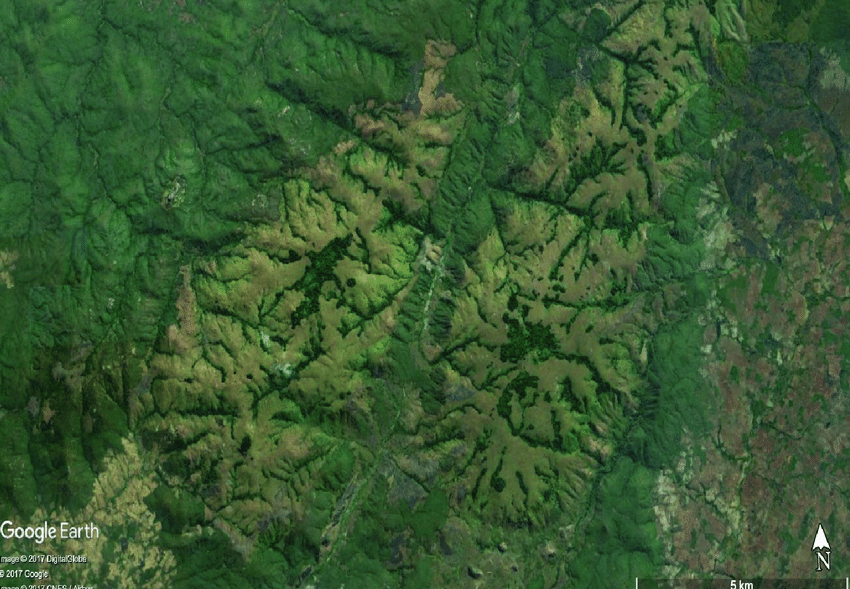

In [2]:
from PIL import Image
import requests

url = 'https://huggingface.co/nielsr/convnext-tiny-finetuned-eurostat/resolve/main/forest.png'
image = Image.open(requests.get(url, stream=True).raw)
image

In [4]:
from PIL import Image

# Path to your local image
image_path = 'cake.jpg'  # Replace with your image's path

# Open the local image
image = Image.open(image_path)
# image.show()  # This will display the image


In [1]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

repo_name = "model/swin_tiny"

image_processor = AutoImageProcessor.from_pretrained(repo_name)
model = AutoModelForImageClassification.from_pretrained(repo_name)

In [5]:
# prepare image for the model
encoding = image_processor(image.convert("RGB"), return_tensors="pt")
print(encoding.pixel_values.shape)

torch.Size([1, 3, 224, 224])


In [6]:
import torch

# forward pass
with torch.no_grad():
    outputs = model(**encoding)
    logits = outputs.logits

In [7]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: paella
